In [1]:
#Date of last revision: 07/01/2022
#This code reads in SS data to calculate locaton of eddies and finds the mean values of different variables within the eddies
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma
import glob
import os
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations

In [13]:
# Absolute path of a file
sat_files = sorted(glob.glob('/data/watkinson/Fall2022/Sat_data/1day_regrid/*'))
sat_files[0:1]
n=0
while n < len(sat_files):
    old_name = sat_files[n]
    new_name = (sat_files[n] + '.nc')

# Renaming the file
    os.rename(old_name, new_name)
    n=n+1
#date = os.path.basename(sat_files[0])
#print(date)

In [6]:
# List all matching files
#anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/Original_eddies/Anticyclonic/Anticyclonic_*.nc'))
#anti_files = anti_files[508:1965]
#print(anti_files.index('/data/watkinson/Fall2022/Eddy_data/Original_eddies/Anticyclonic/Anticyclonic_20061231.nc'))
#cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/Original_eddies/Cyclonic/Cyclonic_*.nc'))
#print(cycl_files.index('/data/watkinson/Fall2022/Eddy_data/Original_eddies/Cyclonic/Cyclonic_20061231.nc'))
#cycl_files = cycl_files[508:1965]

anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anticyclonic_*.nc'))
#cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_*.nc'))
num_files = len(anti_files)#number of Cyclonic eddy files for the loop
#print(files)
#print(num_files)

ds = xr.open_dataset(anti_files[0])#load in the first Cyclonic eddy file from the directory (02/08/1999)
df = ds.to_dataframe()#convert xarray Dataset to panda dataframe
#print(df)

n  = 1
while n < num_files:
    # Load a single dataset
    xs = xr.open_dataset(anti_files[n])
    df2 = xs.to_dataframe()
    
    # Add the dataset to the list
    df = df.append(df2)
    n=n+1


/tmp/ipykernel_342535/2287429514.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_342535/2287429514.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_342535/2287429514.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_342535/2287429514.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_342535/2287429514.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_342535/228

In [7]:
#df.head()
dir = '/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/'
df.to_pickle(dir + 'Anticyclonic_tuned_eddies_2003_to_2005.pkl')

In [38]:

################take satelite files pats, sort them and load them into list
sat_files = sorted(glob.glob('/data/watkinson/Fall2022/Sat_data/1day_regrid/*.nc'))


sat_files = sat_files[0:1091]
#print(sat_files.index('/data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20051229.nc'))

print(len(sat_files))
#print(sat_files)

################take anticyclonic eddy files paths, sort them and load them into list
#anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/Original_eddies/Anticyclonic/Anticyclonic_*.nc'))
#anti_files = anti_files[508:1965]

anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anticyclonic_*.nc'))

print(len(anti_files))
#take cyclonic eddy files paths, sort them and load them into list
#cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/Original_eddies/Cyclonic/Cyclonic_*.nc'))
#cycl_files = cycl_files[508:1965]
cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_*.nc'))
print(len(cycl_files))
'''
#take satelite files pats, sort them and load them into list
#sat_files = sorted(glob.glob('/data/watkinson/Summer2022/data/cafe/1day_regrid/*.nc'))

#print(len(sat_files))
#take anticyclonic eddy files paths, sort them and load them into list
#anti_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_2004*.nc'))
#anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anticyclonic_2004*.nc'))
#print(len(anti_files))
#take cyclonic eddy files paths, sort them and load them into list
#cycl_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_2004*.nc'))
#cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_2004*.nc'))
#print(len(cycl_files))
'''
cycl_chlor_max = list()#empty list to load cyclonic eddy chlorophyll mean vlaues into throghout loop below
anti_chlor_max = list()#empty list to load anticyclonic eddy chlorophyll mean values into throghout loop below

cycl_chlor_min = list()#empty list to load cyclonic eddy chlorophyll mean vlaues into throghout loop below
anti_chlor_min = list()

n=0 #set n to 0 so the loop starts with first file in list
while n < len(anti_files): #once finalized, put this inside a funciton so you can calcualte the mean for multiple variables
    #Load in data
    a = EddiesObservations.load_file(anti_files[n])#anticyclonic eddy data
    c = EddiesObservations.load_file(cycl_files[n])#cyclonic eddy data
    sat_data = RegularGridDataset((sat_files[n]),"lon","lat",nan_masking=False)#satellite data
    
    #this interpolates the satellite data grid onto the contours of the eddy data and uses mean function to calcualte values inside these contours
        #can also do this method for: ‘center’, ‘mean’, ‘max’, ‘min’, ‘nearest’ 
    anti_chlor = a.interp_grid(sat_data, "phyto_c", method="max", intern=False)#this interpolates the sa
    cycl_chlor = c.interp_grid(sat_data, "phyto_c", method="max", intern=False)
    
    anti_chlor_m = a.interp_grid(sat_data, "phyto_c", method="min", intern=False)#this interpolates the sa
    cycl_chlor_m = c.interp_grid(sat_data, "phyto_c", method="min", intern=False)
    #append the result for each file loop to the variables below
    anti_chlor_max = np.concatenate([anti_chlor_max,anti_chlor])
    cycl_chlor_max = np.concatenate([cycl_chlor_max,cycl_chlor])
    
    anti_chlor_min = np.concatenate([anti_chlor_min,anti_chlor_m])
    cycl_chlor_min = np.concatenate([cycl_chlor_min,cycl_chlor_m])
    #anti_chlor_mean.append(anti_chlor)
    #cycl_chlor_mean.append(cycl_chlor)
    
    n=n+1


We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030101.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030102.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030104.nc


1091
1091
1091


We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030105.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030106.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030107.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030108.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030109.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030110.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030111.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030112.nc
We assume pixel position of grid is cent

In [39]:
print("# of Anticyclonic Eddies in 2004:", np.size(anti_chlor_max))
print("# of Anticyclonic Eddies filled with inf:",np.count_nonzero(np.isinf(anti_chlor_max)))
#M = anti_chlor_max[~np.isnan(anti_chlor_max)]
M = anti_chlor_max[~np.isinf(anti_chlor_max)]

print("# of Anticyclonic Eddies that have a value:", np.size(M))
print("Index of Anticyclonic Eddies that have data:",np.where(anti_chlor_max>0))
print("# of Cyclonic Eddies in 2004:", np.size(cycl_chlor_max))
print("# of Cyclonic Eddies filled with nan:",np.count_nonzero(np.isinf(cycl_chlor_max)))
N = cycl_chlor_max[~np.isinf(cycl_chlor_max)]
print("# of Cyclonic Eddies that have a value:", np.size(N))
print("Index of Cyclonic Eddies that have data:",np.where(cycl_chlor_max>0))
average_daily_anti = len(anti_chlor_max)/366
average_daily_cycl = len(cycl_chlor_max)/366
print("Average Number of Cyclonic Eddies per day:",average_daily_cycl)
print("Average Number of Antiyclonic Eddies per day:",average_daily_anti)

# of Anticyclonic Eddies in 2004: 7407
# of Anticyclonic Eddies filled with inf: 0
# of Anticyclonic Eddies that have a value: 7407
Index of Anticyclonic Eddies that have data: (array([   0,    1,    2, ..., 7401, 7402, 7405]),)
# of Cyclonic Eddies in 2004: 8356
# of Cyclonic Eddies filled with nan: 0
# of Cyclonic Eddies that have a value: 8356
Index of Cyclonic Eddies that have data: (array([   0,    2,    3, ..., 8351, 8352, 8353]),)
Average Number of Cyclonic Eddies per day: 22.830601092896174
Average Number of Antiyclonic Eddies per day: 20.237704918032787


In [51]:
dir = '/data/watkinson/Fall2022/Eddy_data/Original_eddies/'
import pandas as pd
cycl_eddies = pd.read_pickle(dir + "Cyclonic_OG_eddies_2003_to_2006.pkl")
print(cycl_eddies)

cycl_eddies = cycl_eddies.droplevel(0)
cycl_eddies = cycl_eddies.reset_index(drop=True)
cycl_eddies = cycl_eddies.iloc[:,[0,5,17,18,19,20,23]]
cycl_eddies

#cycl_eddies.time

              amplitude  effective_contour_height  effective_contour_latitude  \
obs NbSample                                                                    
0   0             0.030                      0.11                   26.910000   
    1             0.030                      0.11                   26.920000   
    2             0.030                      0.11                   26.920000   
    3             0.030                      0.11                   26.930000   
    4             0.030                      0.11                   26.939999   
...                 ...                       ...                         ...   
6   45            0.048                     -0.26                   31.429998   
    46            0.048                     -0.26                   31.429998   
    47            0.048                     -0.26                   31.429998   
    48            0.048                     -0.26                   31.429998   
    49            0.048     

,amplitude,effective_radius,speed_radius,time,uavg_profile,effective_area,speed_area
0,0.030,12200.0,12200.0,2003-01-01,0.4225,NaN,NaN
1,0.030,12200.0,12200.0,2003-01-01,0.4219,NaN,NaN
2,0.030,12200.0,12200.0,2003-01-01,0.4212,NaN,NaN
3,0.030,12200.0,12200.0,2003-01-01,0.4206,NaN,NaN
4,0.030,12200.0,12200.0,2003-01-01,0.4200,NaN,NaN
...,...,...,...,...,...,...,...
949395,0.048,20300.0,20300.0,2006-12-31,0.3358,1.199588e+09,1.199588e+09
949396,0.048,20300.0,20300.0,2006-12-31,0.3298,1.199588e+09,1.199588e+09
949397,0.048,20300.0,20300.0,2006-12-31,0.3239,1.199588e+09,1.199588e+09
949398,0.048,20300.0,20300.0,2006-12-31,0.3179,1.199588e+09,1.199588e+09


In [47]:
#dir = '/data/watkinson/Spring2022/Satellite/data/eddies/'
#dir = '/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/'
#import pandas as pd
#cycl_eddies = pd.read_pickle(dir + "Cyclonic_eddies_2004.pkl")
#dir = '/data/watkinson/Fall2022/Eddy_data/Original_eddies/'
dir = '/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/'
import pandas as pd
cycl_eddies = pd.read_pickle(dir + "Cyclonic_tuned_eddies_2003_to_2005.pkl")
#cycl_eddies = cycl_eddies.droplevel(0)
cycl_eddies = cycl_eddies.iloc[6::50,:]

#cycl_eddies = cycl_eddies.iloc[:,[0,5,17,18,19,]]#20,23]]
#print(cycl_eddies)
#cycl_eddies = anti_eddies.iloc[:,[1,18]]#selecting amplitude and time from the ds dataframe, for original eddies
#cycl_eddies = cycl_eddies.iloc[:,[1,22]]#selecting amplitude and time from the ds dataframe
cycl_eddies = cycl_eddies.reset_index(drop=True)#drop previous method of indexing and reset
cycl_eddies['time']=pd.to_datetime(cycl_eddies['time'])#convert entire "Dates" Column to datetime format this time 
cycl_eddies.index=cycl_eddies['time']#replace index with entire "Dates" Column to work with groupby function
#cycl_eddies = cycl_eddies.iloc[:,[0,1,2,4]]#,5,6]]#simplify dataframe to just time index and amplitude
#cycl_eddies = cycl_eddies["2004-01-01":"2004-12-31"]
cycl_eddies['cycl_chlor_max']=cycl_chlor_max
cycl_eddies['cycl_chlor_min']=cycl_chlor_min
cycl_eddies.replace([np.inf,-np.inf,-1.000000e+40,1.000000e+40,0],np.nan,inplace=True)
cycl_eddies.dropna(inplace=True)

print(cycl_eddies)


#dir = '/data/watkinson/Fall2022/Eddy_data/Original_eddies/'
dir = '/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/'
import pandas as pd
anti_eddies = pd.read_pickle(dir + "Anticyclonic_tuned_eddies_2003_to_2005.pkl")
#anti_eddies = pd.read_pickle(dir + "Anticyclonic_eddies_2004.pkl")
#anti_eddies = anti_eddies.droplevel(0)
anti_eddies = anti_eddies.iloc[6::50,:]
#anti_eddies = anti_eddies.iloc[:,[1,18]]#selecting amplitude(0) and time from the ds dataframe 12=speed for original eddies
#anti_eddies = anti_eddies.iloc[:,[1,22]]
#anti_eddies = anti_eddies.iloc[:,[0,5,17,18,19]]#,20,23]]
anti_eddies = anti_eddies.reset_index(drop=True)#drop previous method of indexing and reset
anti_eddies['time']=pd.to_datetime(anti_eddies['time'])#convert entire "Dates" Column to datetime format this time 
anti_eddies.index=anti_eddies['time']#replace index with entire "Dates" Column to work with groupby function
#anti_eddies = anti_eddies.iloc[:,[0]]#simplify dataframe to just time index and amplitude
#anti_eddies = anti_eddies["2004-01-01":"2004-12-31"]
#anti_eddies = anti_eddies.iloc[:,[0,1,2,4]]#,5,6]]
anti_eddies['anti_chlor_max']=anti_chlor_max
anti_eddies['anti_chlor_min']=anti_chlor_min
anti_eddies.replace([np.inf,-np.inf,-1.000000e+40,1.000000e+40,0],np.nan,inplace=True)
anti_eddies.dropna(inplace=True)
print(anti_eddies)

            amplitude  effective_area  effective_contour_height  \
time                                                              
2003-01-01     0.0628    1.222427e+10                    -0.010   
2003-01-01     0.0386    1.388035e+10                    -0.045   
2003-01-01     0.4303    4.243816e+10                    -0.090   
2003-01-01     0.0721    1.621174e+10                    -0.090   
2003-01-01     0.0441    1.172933e+10                    -0.090   
...               ...             ...                       ...   
2005-12-29     0.0472    1.594815e+10                    -0.030   
2005-12-29     0.2672    3.150591e+10                    -0.070   
2005-12-29     0.2045    3.174212e+10                    -0.075   
2005-12-29     0.1379    2.225095e+10                    -0.085   
2005-12-29     0.1561    1.805903e+10                    -0.085   

            effective_contour_latitude  effective_contour_longitude  \
time                                                     

In [48]:
cycl_chlor_mean_min = cycl_eddies.cycl_chlor_min.resample('D').mean()
cycl_chlor_mean_max = cycl_eddies.cycl_chlor_max.resample('D').mean()
#cycl_chlor_mean_min = cycl_eddies.cycl_chlor_min.resample('M').mean()
#cycl_chlor_mean_max = cycl_eddies.cycl_chlor_max.resample('M').mean()

anti_chlor_mean_min = anti_eddies.anti_chlor_min.resample('D').mean()
anti_chlor_mean_max = anti_eddies.anti_chlor_max.resample('D').mean()
#anti_chlor_mean_min = anti_eddies.anti_chlor_min.resample('M').mean()
#anti_chlor_mean_max = anti_eddies.anti_chlor_max.resample('M').mean()
print(anti_chlor_mean_min)

time
2003-01-01     6.062837
2003-01-02    14.797894
2003-01-03    19.295901
2003-01-04     6.831210
2003-01-05    19.758136
                ...    
2005-12-25    17.144930
2005-12-26    11.449861
2005-12-27    13.674449
2005-12-28    11.720333
2005-12-29    13.327769
Freq: D, Name: anti_chlor_min, Length: 1094, dtype: float64


In [49]:

print("Daily-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_max.describe())
print("Daily-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_min.describe())
print("Daily-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_max.describe())
print("Daily-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_min.describe())
'''
print("Monthly-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_max.describe())
print("Monthly-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_min.describe())
print("Monthly-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_max.describe())
print("Monthly-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_min.describe())
'''

Daily-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:
 count    1037.000000
mean       31.167460
std        39.106967
min         6.572959
25%        23.240692
50%        26.518321
75%        30.761942
max       783.704088
Name: anti_chlor_max, dtype: float64
Daily-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:
 count    1037.000000
mean       15.210186
std         4.196384
min         2.737441
25%        12.347792
50%        15.402562
75%        17.837313
max        29.108303
Name: anti_chlor_min, dtype: float64
Daily-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:
 count    1036.000000
mean       41.720865
std        98.609897
min         8.119125
25%        24.928317
50%        28.585248
75%        32.998593
max      1810.449479
Name: cycl_chlor_max, dtype: float64
Daily-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:
 count    1036.000000
mean       16.273644
std         5.237178
mi

'\nprint("Monthly-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_max.describe())\nprint("Monthly-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_min.describe())\nprint("Monthly-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_max.describe())\nprint("Monthly-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_min.describe())\n'

In [50]:
#z = cycl_eddies.amplitude.resample('D').mean()
#print(z)
#cycl_chlor_mean_max = np.ma.masked_greater(cycl_chlor_mean_max, 15)
#anti_chlor_mean_min[anti_chlor_mean_min < 50] = np.nan
cycl_chlor_mean_max[cycl_chlor_mean_max > 1000] = np.nan

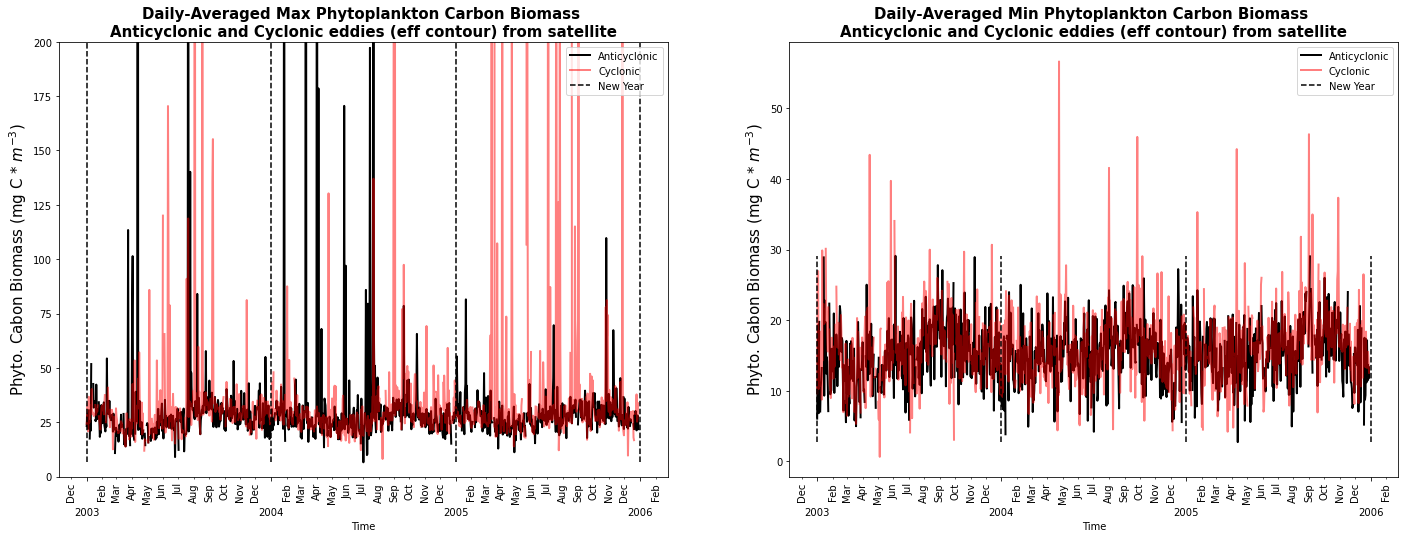

In [54]:
start = dt.datetime(2003,1,1)
new_dates = [start + dt.timedelta(days=i) for i in range(1094)]

#print(new_dates)

x = new_dates
#x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
import matplotlib.dates as mdates
xfmt_major=mdates.DateFormatter('\n\n%Y')
xfmt_minor=mdates.DateFormatter('%b')
#xfmt_major=mdates.DateFormatter('%b')
#xfmt_minor=mdates.DateFormatter('%d')
months=mdates.MonthLocator()
years=mdates.YearLocator()
#days=mdates.DayLocator(interval=15)
#fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.8,.8])
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
#ax1.set_title('Average Small Zooplankton Biomass within \nAnticyclonic eddies from model',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Average Small Zooplankton Biomass within \nCyclonic eddies from model',loc='center',fontsize=15,fontweight='bold')
#ax1.set_title('Max and Min Chlorphyll within \nAnticyclonic eddies from  satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Max and Min Chlorphyll within \nCyclonic eddies from satellite',loc='center',fontsize=15,fontweight='bold')
#ax1.set_title('Daily-Averaged Max Chlorophyll within GoM-tuned \nAnticyclonic and Cyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Daily-Averaged Min Chlorophyll within GoM-tuned \nAnticyclonic and Cyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
ax1.set_title('Daily-Averaged Max Phytoplankton Carbon Biomass \nAnticyclonic and Cyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
ax2.set_title('Daily-Averaged Min Phytoplankton Carbon Biomass \nAnticyclonic and Cyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax1.set_title('Daily-Averaged Max Net Primary Productivity within \nAnticyclonic and Cyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Daily-Averaged Min Net Primary Productivity within \nAnticyclonic and Cyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
ax1.set_ylim(0,200)
#ax2.set_ylim(100,700)
#plt.title('Average Small Zooplankton Biomass within eddies from model',loc='center',fontsize=15,fontweight='bold')#,y=1.03)
ax1.plot(x,anti_chlor_mean_max,label='Anticyclonic',color='k',lw=2)#,alpha=.5)
ax2.plot(x,anti_chlor_mean_min,label='Anticyclonic',color='k',lw=2)#,alpha=.5)
ax1.plot(x,cycl_chlor_mean_max,label='Cyclonic',color='red',lw=2,alpha=.5)
ax2.plot(x,cycl_chlor_mean_min,label='Cyclonic',color='red',lw=2,alpha=.5)
'''
ax3 = ax1.twinx()
ax4 = ax2.twinx()
ax3.plot(x,cycl_eddies.effective_radius.resample('D').mean(), label='Amplitude',color='blue',lw=2,alpha=.5)
ax3.plot(x,anti_eddies.effective_radius.resample('D').mean(), label='Amplitude',color='green',lw=2,alpha=.5)
ax4.plot(x,cycl_eddies.effective_radius.resample('D').mean(), label='Amplitude',color='blue',lw=2,alpha=.5)
ax4.plot(x,anti_eddies.effective_radius.resample('D').mean(), label='Amplitude',color='green',lw=2,alpha=.5)
'''
ax1.vlines(x=['2003-01-01','2004-01-01','2005-01-01','2006-01-01'],
          ymin=np.min(anti_chlor_mean_max), ymax=np.max(anti_chlor_mean_max),colors='k',ls='--',label='New Year')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(xfmt_major)
#ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_minor_formatter(xfmt_minor)
plt.setp(ax1.xaxis.get_minorticklabels(), rotation=90)
ax1.set_xlabel('Time')
#ax1.set_ylabel('Chl (mg * $m^{-3}$)',fontsize=15)
ax1.set_ylabel('Phyto. Cabon Biomass (mg C * $m^{-3}$)',fontsize=15)
#ax1.set_ylabel('Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',fontsize=15)
ax1.legend(loc='best')

ax2.vlines(x=['2003-01-01','2004-01-01','2005-01-01','2006-01-01'],
          ymin=np.min(anti_chlor_mean_min), ymax=np.max(anti_chlor_mean_min),colors='k',ls='--',label='New Year')
ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(xfmt_major)
#ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2.xaxis.set_minor_locator(months)
ax2.xaxis.set_minor_formatter(xfmt_minor)
plt.setp(ax2.xaxis.get_minorticklabels(), rotation=90)
ax2.set_xlabel('Time')
#ax2.set_ylabel('Chl (mg * $m^{-3}$)',fontsize=15)
ax2.set_ylabel('Phyto. Cabon Biomass (mg C * $m^{-3}$)',fontsize=15)
#ax2.set_ylabel('Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',fontsize=15)
ax2.legend(loc='best')
#ax3.set_ylabel('Amplitude (meters)',fontsize=15)
#ax4.set_ylabel('Amplitude (meters)',fontsize=15)
plt.show()